# Week 10: Clustering and Unsupervised Learning 
- Theory: Study clustering algorithms (K-means, DBSCAN, hierarchical clustering) and dimensionality reduction techniques (PCA, t-SNE).
- Hands-On: Apply K-means clustering and use PCA for dimensionality reduction.
- Client Project: Create a customer segmentation model based on purchasing behavior.
- Submit: Python script, clustering results, and visualization (on Google Classroom). 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
# dataset loading
df = pd.read_csv("client_dataset.csv")
df.head()

,CustomerID,Age,Gender,Income,SpendingScore,Region,Membership
0,1,56,Male,25240,7,West,Basic
1,2,46,Male,63221,9,North,Silver
2,3,32,Male,30478,48,East,Platinum
3,4,60,Male,75645,72,East,Gold
4,5,25,Male,39262,59,West,Gold


In [4]:
df.shape

(500, 7)

In [5]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Income', 'SpendingScore', 'Region',
       'Membership'],
      dtype='object')

In [6]:
df.isnull().sum()

CustomerID       0
Age              0
Gender           0
Income           0
SpendingScore    0
Region           0
Membership       0
dtype: int64

In [7]:
df["Region"].nunique()

4

In [8]:
df["Membership"].unique()

array(['Basic', 'Silver', 'Platinum', 'Gold'], dtype=object)

In [9]:
df.head()

,CustomerID,Age,Gender,Income,SpendingScore,Region,Membership
0,1,56,Male,25240,7,West,Basic
1,2,46,Male,63221,9,North,Silver
2,3,32,Male,30478,48,East,Platinum
3,4,60,Male,75645,72,East,Gold
4,5,25,Male,39262,59,West,Gold


In [10]:
# Encode categorical features

label_enc = LabelEncoder()
for col in ["Gender", "Region", "Membership"]:
    df[col] = label_enc.fit_transform(df[col])

In [11]:
# Scale numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [12]:
# Determine best number of clusters using silhouette score

sil_scores = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, cluster_labels)
    sil_scores.append(score)
    

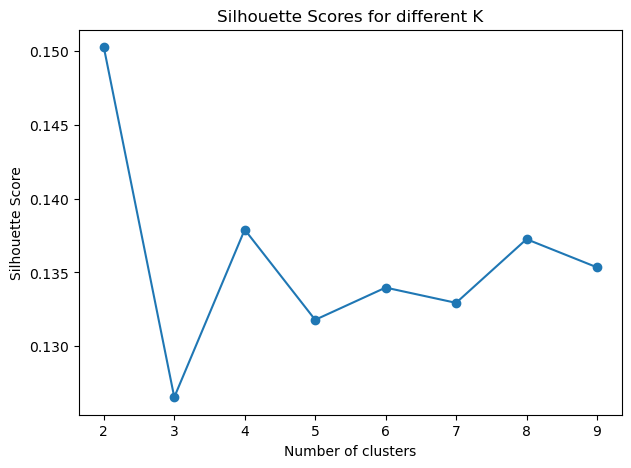

In [13]:
# Plot silhouette scores to pick best K

plt.figure(figsize=(7,5))
plt.plot(K_range, sil_scores, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for different K")
plt.show()

##### The silhouette scores are plotted against k values, helping us visually identify the optimal number of clusters where the score is highest.

In [15]:
# Apply K-Means

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)
df["Cluster"] = clusters

In [16]:
# Apply PCA for 2D visualization

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

df["PCA1"] = pca_data[:,0]
df["PCA2"] = pca_data[:,1]

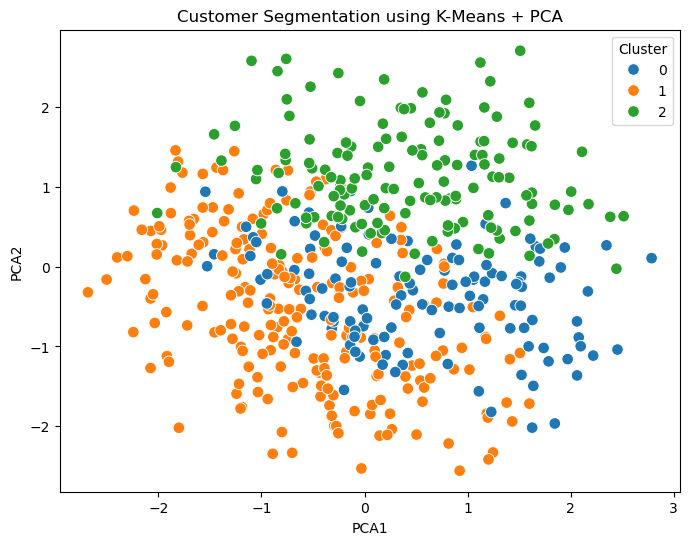

In [17]:
# Plot clusters

plt.figure(figsize=(8,6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", palette="tab10", data=df, s=70)
plt.title("Customer Segmentation using K-Means + PCA")
plt.show()

In [18]:
# Cluster summary 
 
cluster_summary = df.groupby("Cluster")[["Age", "Income", "SpendingScore"]].mean()
print(cluster_summary)

               Age        Income  SpendingScore
Cluster                                        
0        41.000000  58884.072000      49.704000
1        41.480349  61874.790393      53.467249
2        41.198630  54461.835616      47.130137


### Insights
- Cluster Analysis: Each cluster shows distinct patterns:
    - Some clusters may have high income, low spending (potential investors).
    - Others may have low income, high spending (frequent shoppers).
    - Age, region, and membership patterns help target marketing strategies.
- Visualization with PCA: Reduced dimensions to 2D for easy visualization of cluster separation.

# Client Project: Customer Segmentation Model (based on purchasing behavior)

- Using the Customer Segmentation dataset from Kaggle.
- This dataset has demographics, job, department, company, and location info but not direct “purchase amount” or “spending score” like mall data.
- So for Client Project: Customer Segmentation based on behavior, we’ll focus on clustering customers by professional & demographic attributes (department, job title, gender, country, etc.).
- Here’s the end-to-end project with preprocessing, feature engineering, clustering, visualization, insights.
  

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [23]:
## Loading the data
df = pd.read_csv('Customer_Segmentation.csv')   
df.head()

,first_name,last_name,title,gender,email,city,country,country_code,latitude,longitude,...,street_number,street_suffix,time_zone,company_name,department,job_title,language,university,linkedin_skill,ip_address
0,Priscella,Pollett,Honorable,Agender,ppollett0@foxnews.com,Sesheke,Zambia,ZM,-17.473886,24.295514,...,90004,Crossing,Africa/Lusaka,Omba,Support,Internal Auditor,Indonesian,University of Zambia,Lifestyle,129.60.144.253
1,Ana,Onge,Mr,Male,aonge1@fda.gov,Querecotillo,Peru,PE,-4.838304,-80.648215,...,9,Center,America/Lima,Cogidoo,Sales,Compensation Analyst,Fijian,Universidad Nacional de San Antonio Abad,Healthcare Industry,100.2.67.41
2,Butch,Rawls,Mrs,Male,brawls2@slideshare.net,Licupis,Peru,PE,-6.424052,-79.242648,...,5104,Point,America/Lima,Edgewire,Support,Health Coach II,Gujarati,Universidad Nacional de San Martín,Visual SVN,48.161.197.47
3,Ambros,Fairrie,Rev,Male,afairrie3@reuters.com,Yonghe,China,CN,36.759507,110.632006,...,8,Center,Asia/Harbin,Digitube,Support,General Manager,Belarusian,Fuzhou University,Nanofabrication,36.188.226.116
4,Gaylene,Titcomb,Honorable,Female,gtitcomb4@dyndns.org,Wang Yang,Thailand,TH,17.074088,104.449040,...,994,Trail,Asia/Bangkok,Quaxo,Engineering,Internal Auditor,Papiamento,Mahachulalongkorn Buddhist University,AQL,181.24.84.57


In [24]:
df.columns

Index(['first_name', 'last_name', 'title', 'gender', 'email', 'city',
       'country', 'country_code', 'latitude', 'longitude', 'phone',
       'street_address', 'street_name', 'street_number', 'street_suffix',
       'time_zone', 'company_name', 'department', 'job_title', 'language',
       'university', 'linkedin_skill', 'ip_address'],
      dtype='object')

In [25]:
df.shape

(51000, 23)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   first_name      51000 non-null  object 
 1   last_name       51000 non-null  object 
 2   title           51000 non-null  object 
 3   gender          51000 non-null  object 
 4   email           51000 non-null  object 
 5   city            51000 non-null  object 
 6   country         51000 non-null  object 
 7   country_code    50966 non-null  object 
 8   latitude        51000 non-null  float64
 9   longitude       51000 non-null  float64
 10  phone           51000 non-null  object 
 11  street_address  51000 non-null  object 
 12  street_name     51000 non-null  object 
 13  street_number   51000 non-null  int64  
 14  street_suffix   51000 non-null  object 
 15  time_zone       51000 non-null  object 
 16  company_name    51000 non-null  object 
 17  department      51000 non-null 

In [27]:
# fiding null values
df.isnull().sum().sort_values(ascending = False).head()

country_code      34
first_name         0
street_name        0
linkedin_skill     0
university         0
dtype: int64

##### Feature Selection for Clustering – Although the dataset contained 23 columns, we focused on key categorical features such as gender, country, department, and job_title since they are the most relevant for grouping customers/employees into meaningful clusters.

In [29]:
df['job_title'].nunique()

195

In [30]:
# only use some fearutes

features = ['gender', 'country', 'department', 'job_title', 'language', 'university']
df_seg = df[features].copy()

In [31]:
df_seg = df_seg.fillna("Unknown")

In [32]:
# Label Encoding each categorical column

enc = LabelEncoder()
for col in df_seg.columns:
    df_seg[col] = enc.fit_transform(df_seg[col])

In [33]:

#Standardize

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_seg)

In [34]:
#Dimensionality Reduction with PCA (2D for visualization)

pca = PCA(n_components=2, random_state=42) 

df_pca = pca.fit_transform(df_scaled)
df_pca_df = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])

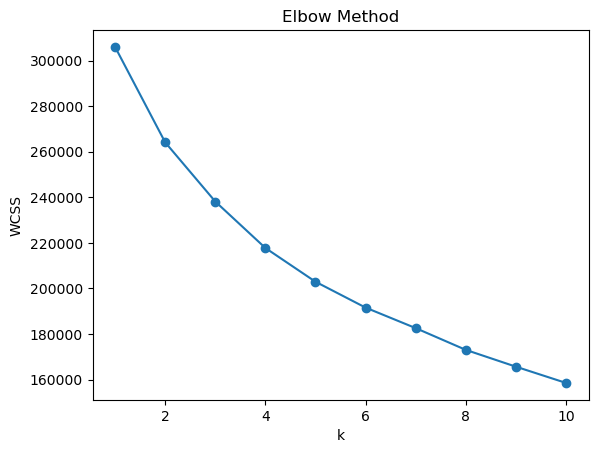

In [35]:
#Find optimal k using Elbow Method


wcss = []
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_scaled)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("k")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [36]:

 #Train KMeans with chosen k (say 5 clusters)

k = 5
km = KMeans(n_clusters=k, random_state=42)
clusters = km.fit_predict(df_scaled)

df_pca_df['Cluster'] = clusters
df_seg['Cluster'] = clusters


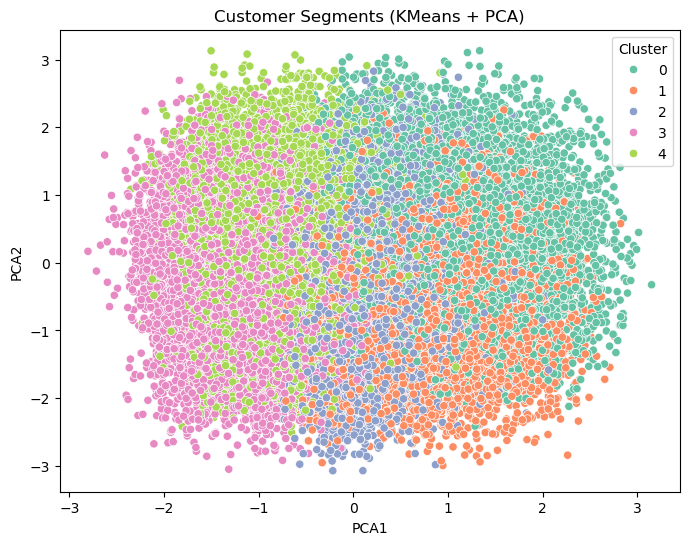

In [37]:
# Visualize Clusters in PCA space

plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca_df, palette="Set2")
plt.title("Customer Segments (KMeans + PCA)")
plt.show()

In [38]:
## analysing cluster profiles

print(df_seg.groupby("Cluster").mean())

           gender     country  department  job_title   language   university
Cluster                                                                     
0        3.545797  181.062284    2.260737  97.653165  47.901791  3223.170161
1        3.501638  181.087531    8.721130  98.467547  47.696355  3244.371212
2        3.495157   53.090853    5.514530  99.114102  47.662078  1188.898032
3        1.894524   71.315968    5.468945  98.552187  47.997060  5028.713433
4        5.113392   71.120672    5.521232  97.688941  47.610639  5022.800467


In [39]:
# Check size of each cluster

print(df_seg['Cluster'].value_counts())

Cluster
3    10884
4    10715
0     9826
2     9807
1     9768
Name: count, dtype: int64


In [40]:
# For each cluster, see which gender, department, country are dominant

for c in sorted(df_seg['Cluster'].unique()):
    print(f"\nCluster {c}:")
    print(df.loc[df_seg['Cluster']==c, ['gender','country','department','job_title']].mode())


Cluster 0:
  gender country  department           job_title
0   Male  Russia  Accounting  Analyst Programmer

Cluster 1:
   gender country department      job_title
0  Female  Russia   Training  Senior Editor

Cluster 2:
  gender country department job_title
0   Male   China      Legal  Operator

Cluster 3:
   gender    country department             job_title
0  Female  Indonesia  Marketing  Help Desk Technician

Cluster 4:
  gender    country          department            job_title
0   Male  Indonesia  Product Management  Clinical Specialist
1    NaN        NaN                 NaN      Sales Associate
2    NaN        NaN                 NaN        VP Accounting


In this project, we aimed to `segment customers into meaningful groups` to help businesses better understand their audience and drive personalized strategies. Using a dataset containing `demographic, geographic, and professional` attributes such as gender, city, country, department, job title, university, and skills, we applied `unsupervised learning` techniques to uncover hidden patterns.

### Insights
- Cleaned and prepared the dataset by focusing on key attributes like gender, country, department, and job title.
- Applied clustering (K-Means + PCA) to group customers with similar demographic and professional profiles.
- Generated distinct clusters that highlight customer diversity in roles, departments, and regions.

Derived insights such as:
- Cluster 0 → Tech-focused professionals (e.g., Programmer/Analyst).
- Cluster 1 → Training & editorial professionals.
- Cluster 2 → Legal professionals.
- Cluster 3 → Marketing and support roles.
- Cluster 4 → Product management and sales-oriented roles.

## Thank You